# Task 1: Importing libraries and Exploring the Dataset.

In [1]:
# Importante Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import joblib
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read The Dataset
data = pd.read_csv('loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print('Column Names :\n', data.columns)

Column Names :
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


- Shape function will show us how many rows and columns in the dataset

In [5]:
data.shape

(614, 13)

####

# Task 2: Definining Exploratory Data Analysis with an overview of the whole project
###

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns).

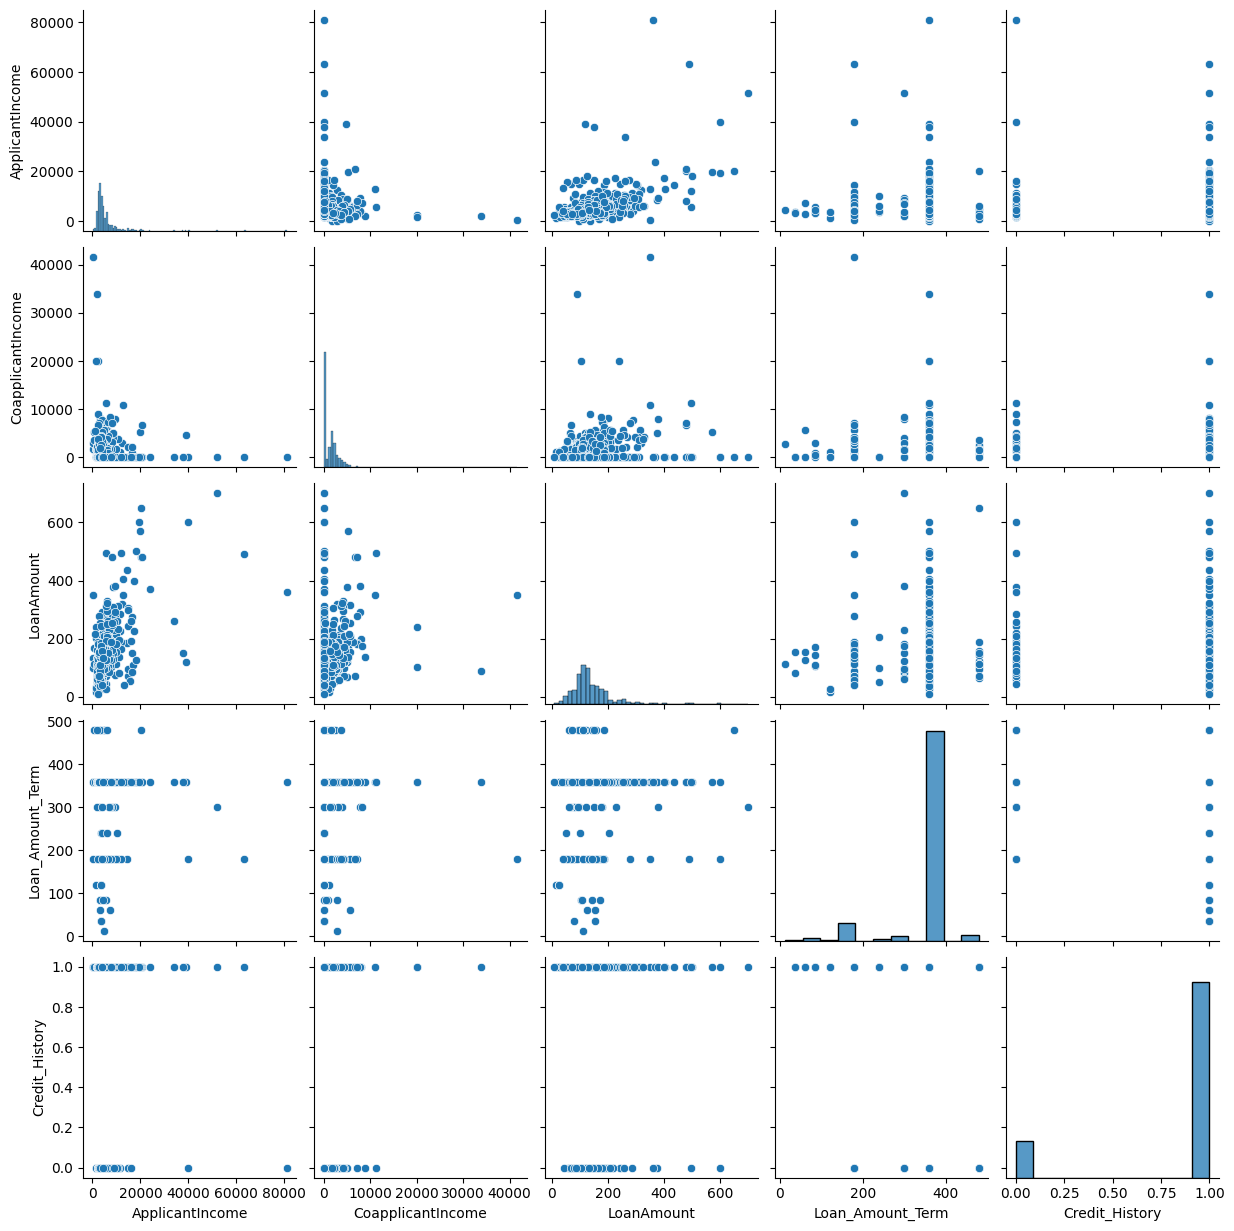

In [7]:
sns.pairplot(data)

#### Data Visualization using piechart and countplot for categorical attributes (columns).

<Axes: title={'center': 'Gener'}>

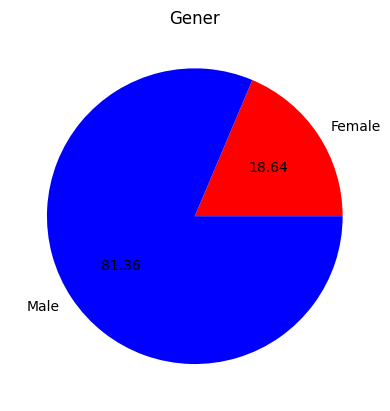

In [8]:
data.groupby('Gender').size().plot(kind='pie', autopct='%.2f', colors=['red', 'blue'], title="Gener")

<Axes: title={'center': 'Dependents'}>

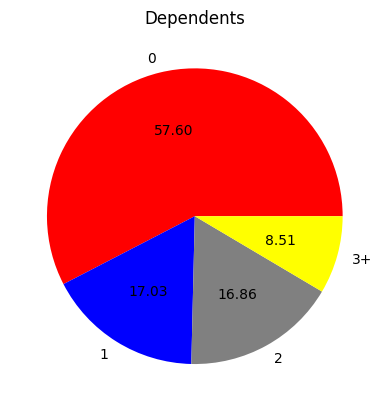

In [9]:
data.groupby('Dependents').size().plot(kind='pie', autopct='%.2f', colors=['red', 'blue', 'gray', 'yellow'], title="Dependents")

<Axes: title={'center': 'Married'}>

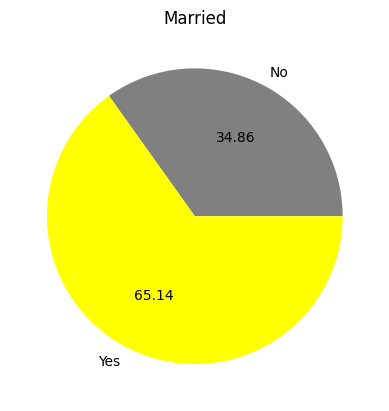

In [10]:
data.groupby('Married').size().plot(kind='pie', autopct='%.2f', colors=['gray', 'yellow'], title="Married")

<Axes: xlabel='Education', ylabel='count'>

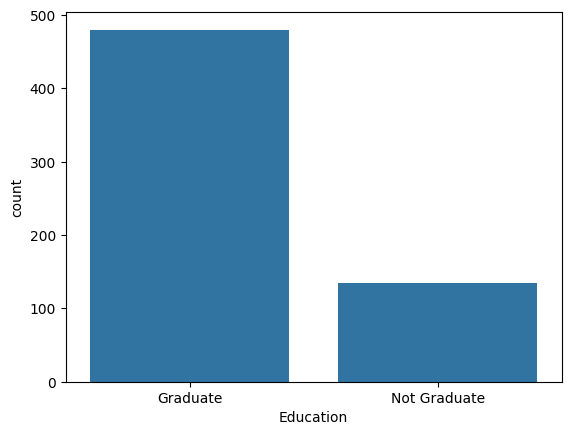

In [11]:
sns.countplot(x='Education',data=data)

<Axes: xlabel='Self_Employed', ylabel='count'>

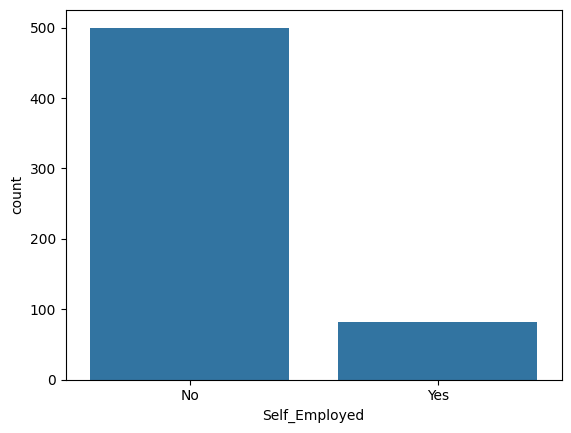

In [12]:
sns.countplot(x='Self_Employed',data=data)

<Axes: xlabel='Education', ylabel='count'>

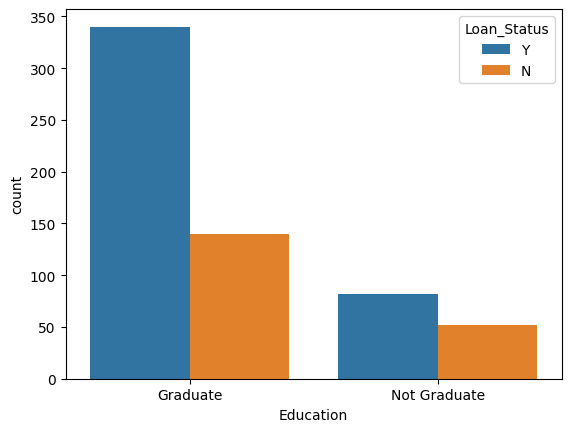

In [13]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Gender', ylabel='count'>

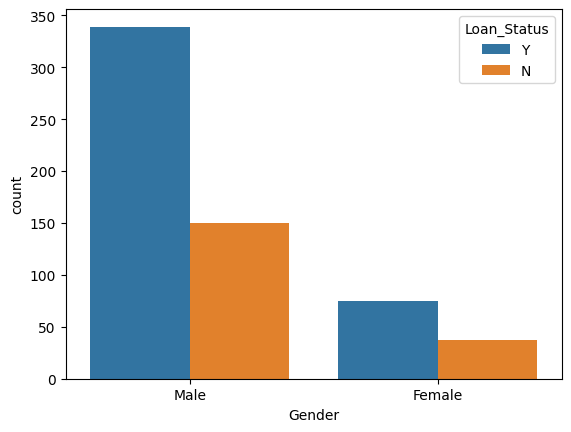

In [14]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

<Axes: xlabel='Property_Area', ylabel='count'>

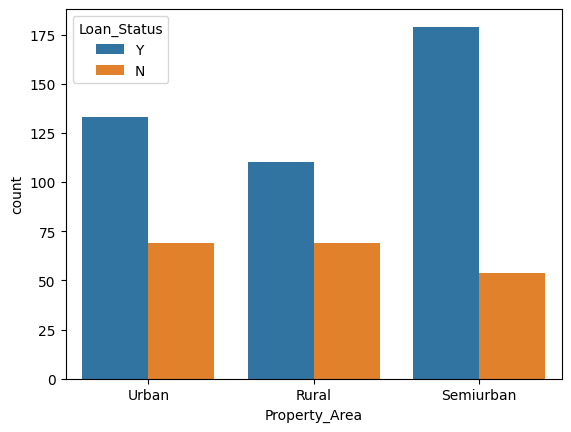

In [15]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)

<Axes: title={'center': 'Property_Area'}>

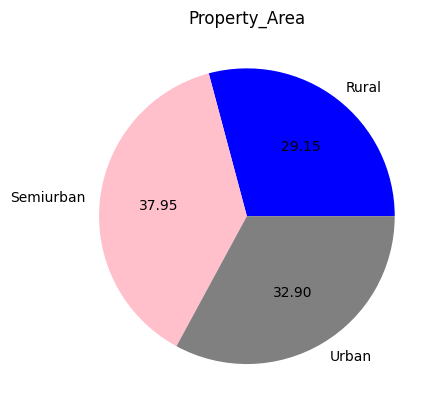

In [16]:
data.groupby('Property_Area').size().plot(kind='pie', autopct='%.2f', colors=['blue', 'pink', 'gray'], title="Property_Area")

#### Matrix form for correlation data "Heatmap"

<Axes: >

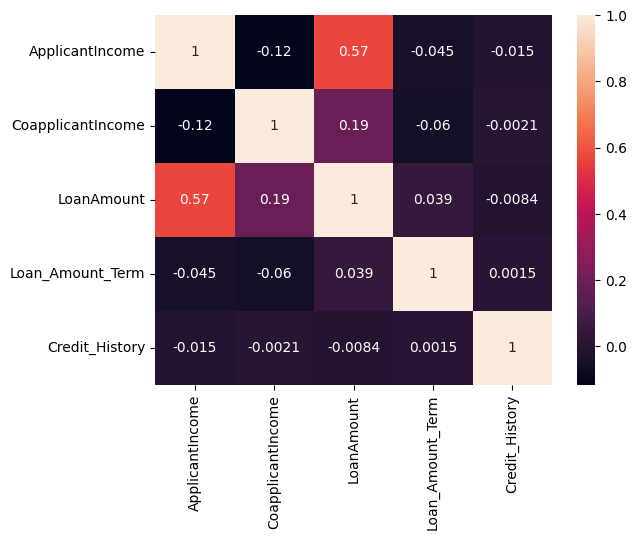

In [17]:
# Select only numeric columns before calculating correlation.
numeric_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix.
correlation_matrix = numeric_data.corr()

# Generate the heatmap.
sns.heatmap(correlation_matrix, annot=True)

#### To understand the correlation present between applicant income and Loan amount I will use scutter plot between the two

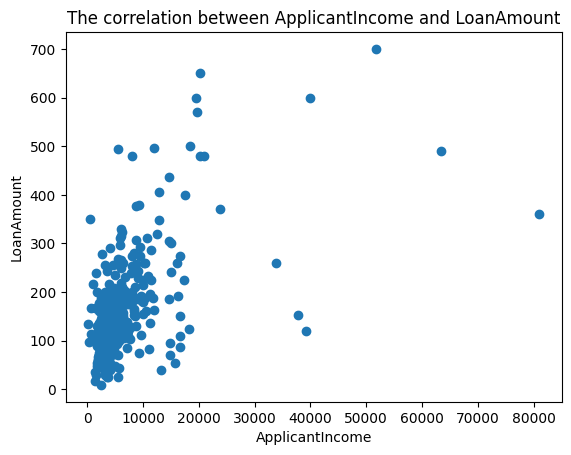

In [18]:
plt.scatter(x='ApplicantIncome',y='LoanAmount',data=data)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('The correlation between ApplicantIncome and LoanAmount')
plt.show()

###
# Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

#### Checking the nulls in data

In [19]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Handle categorical missing data
- Here I replace missing data with mode

In [20]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

#### Handle numerical missing data
- Replaceing missing data with median

In [21]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [22]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
data.shape

(614, 13)

## Checking the Outliers in some of the numerical attributes
- Checking the outliers here in four numerical attributes..

<Axes: >

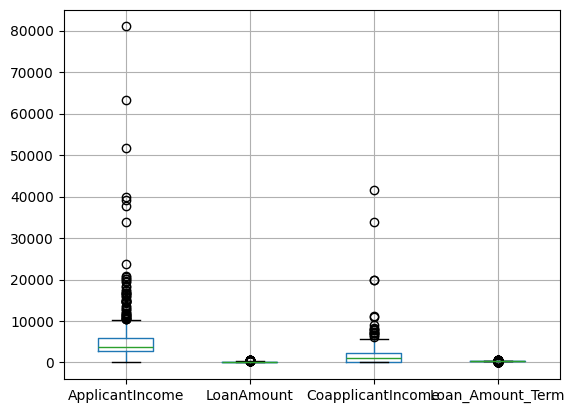

In [24]:
numeric_col = ['ApplicantIncome','LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term']
data.boxplot(numeric_col)

##### I notice that there are an outliers in ApplicantIncome and in CoapplicantIncome columns so I am going to replace them with median for both

#### Here I am use IQR to detect the outliers and be able to remove them

In [25]:
for x in ['ApplicantIncome', 'CoapplicantIncome']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [26]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome      50
CoapplicantIncome    18
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#####
- As we can see, I removed the outliers .. now I replace these null values with median

In [27]:
data['ApplicantIncome'] = data['ApplicantIncome'].fillna(data['ApplicantIncome'].median())
data['CoapplicantIncome'] = data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].median())

In [28]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
data.shape

(614, 13)

######
#### Now the data is clean .. No outliers, no nulls..

##
# Task 4: Create a model that fits the data

#### Convert the categorical data into numerical data
- Now, encode the data which means converting the categorical variables into a numeric form to convert it to a machine-readable form, and this can be done through using LabelEncoder () from Sklearn.preprocessing library, and also using OrdinalEncoder() from Sklearn.preprocessing library also.
- There are a lot of ways to convert the data into numerical data, here I will mention these two ways.

In [30]:
# Label Encode The Target Variable
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)

In [31]:
# Ordinal Encode The features
enc = OrdinalEncoder()
data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']] = enc.fit_transform(data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,128.0,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


#### Splitting it into dependence and independence variables (Target and Features)

In [32]:
x=data.drop(columns=['Loan_ID','Loan_Status'])
y=data['Loan_Status']

#### Splitting the data into training data and testing data
- I am going to split the data into two parts one for training and and one for testing for each of Target and features

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [34]:
print(x_train.shape)

(429, 11)


In [35]:
print(x_test.shape)

(185, 11)


### Data Scaling
- To standardize features by removing the mean and scaling to unit variance using the StandardScalar(). StandardScaler is the industry's go-to algorithm. StandardScaler() standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation

In [36]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Trying Different types of Machine Learning Model to find the best one

# Logistic Regression Model
- This is a classification algorithm which uses a logistic function to predict binary outcome (True/False, 0/1, Yes/No) given an independent variable. The aim of this model is to find a relationship between features and probability of particular outcome. The logistic function used is a logit function which is a log of odds in the favor of the event. Logit function develops a shaped curve with the probability estimated like a step function

In [37]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

Logistic Regression accuracy is: 82.70%


In [38]:
print(predict)

[1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [39]:
prediction = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])
print(prediction)


[1.]


### Confusion Matrix
- One common way to evaluate the quality of a model is to create a confusion matrix, which is a 2×2 table that shows the predicted values from the model vs. the actual values from the test dataset.

Confusion Matrix for Logistic Regression :
 [[ 21  30]
 [  2 132]] 



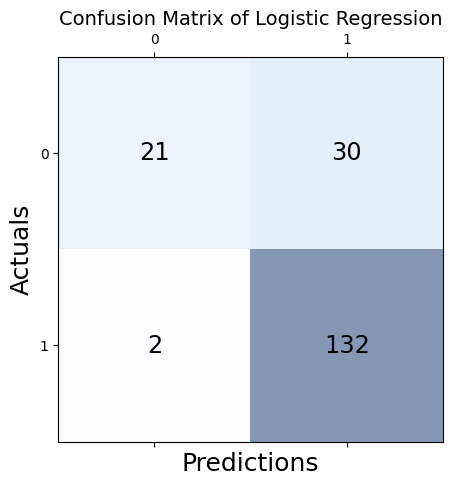

In [40]:
# Confusion Matrix for Logistic Regression
cm = metrics.confusion_matrix(y_test, predict)
print('Confusion Matrix for Logistic Regression :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=14)
plt.show()

# KNN Model
- K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures (e.g., distance function). Classification is done by a majority vote to its neighbors. The data is assigned to the class which has the nearest neighbors. As you increase the number of nearest neighbors, the value of k, accuracy might increase.

In [41]:
KNN=KNeighborsClassifier(n_neighbors=13)
KNN.fit(x_train,y_train)
# Change 'model' to 'KNN' in the following line
y_preds=KNN.predict(x_test)
print(classification_report(y_test, y_preds))
KNNAcc = accuracy_score(y_preds,y_test)
print('KNN model accuracy is: {:.2f}%'.format(KNNAcc*100))

              precision    recall  f1-score   support

         0.0       0.88      0.43      0.58        51
         1.0       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.70      0.74       185
weighted avg       0.84      0.83      0.81       185

KNN model accuracy is: 82.70%


# SVC Model
- Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection. All of these are common tasks in machine learning.You can use them to detect cancerous cells based on millions of images or you can use them to predict future driving routes with a well-fitted regression model.There are specific types of SVMs you can use for particular machine learning problems, like support vector regression (SVR) which is an extension of support vector classification (SVC).A simple linear SVM classifier works by making a straight line between two classes. That means all of the data points on one side of the line will represent a category and the data points on the other side of the line will be put into a different category. This means there can be an infinite number of lines to choose from.Now the training set will be fitted to the SVM classifier. To create the SVM classifier, we will import SVC class from Sklearn.svm library. Below is the code for it:

In [42]:
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
predict_svc = svc.predict(x_test)
print(classification_report(y_test, predict_svc))
SVCAcc = accuracy_score(predict_svc,y_test)
print('SVC model accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

SVC model accuracy is: 82.70%


# ID3 Model
- This is a supervised machine learning algorithm mostly used for classification problems. All features should be discretized in this model, so that the population can be split into two or more homogeneous sets or subsets. This model uses a different algorithm to split a node into two or more sub-nodes. With the creation of more sub-nodes, homogeneity and purity of the nodes increases with respect to the dependent variable.

In [43]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(x_train,y_train)
predict_ID3 = DT.predict(x_test)
print(classification_report(y_test, predict_ID3))
ID3Acc = accuracy_score(predict_svc,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3Acc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

ID3 model accuracy is: 82.70%


# Random Forest Model
- Random forest is a commonly-used machine learning algorithm, which combines the output of multiple decision trees to reach a single result. - - Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.
- It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
- To more information for Random Forest you can visit: https://www.javatpoint.com/machine-learning-random-forest-algorithm

In [44]:
clf=RandomForestClassifier(n_estimators=800)
clf.fit(x_train,y_train)
y_pred_rf=clf.predict(x_test)
print(classification_report(y_test, y_pred_rf))
rfAcc = accuracy_score(y_pred_rf,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(rfAcc*100))

              precision    recall  f1-score   support

         0.0       0.76      0.43      0.55        51
         1.0       0.81      0.95      0.88       134

    accuracy                           0.81       185
   macro avg       0.79      0.69      0.71       185
weighted avg       0.80      0.81      0.79       185

ID3 model accuracy is: 80.54%


#
# Load the Logestic Regresssion Model

#### Load Logistic Regression model with Pickle

In [45]:
file = "loan_predition_model_LR.pkl"
pickle.dump(LR, open(file, 'wb'))

loaded_model = pickle.load(open(file, 'rb'))

pred_Y = loaded_model.predict(x_test)
result = np.round(accuracy_score(y_test, predict) ,2)
print(result)

0.83


In [46]:
with open(file, 'rb') as f:
    k = pickle.load(f)
    
cy = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(cy)

[1.]


#### Load Logistic Regression model with Joblib

In [47]:
file = "loan_prediction_model_LR.joblib"
joblib.dump(LR, open(file, 'wb'))

#### Predict with an example from Pickle file

# Now I am building an Apps for the Prediction:
##### Check LoanWise_app.py